In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [57]:
train_data = pd.read_csv('./data/train.csv', index_col='index')
test_data = pd.read_csv('./data/test_x.csv', index_col='index')

In [58]:
train_data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


In [59]:
drop_columns = ['engnat', 'gender', 'hand', 'race', 
                'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10',
                'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10',
                'wr_12', 'wr_13', 'wf_01', 'wf_02', 'wf_03']
train_data = train_data.drop(drop_columns, axis = 1)

In [60]:
train_data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,familysize,married,religion,urban,voted,wr_11
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,4,3,Other,1,2,0
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,3,1,Hindu,3,2,0
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,3,2,Other,2,1,0
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,0,1,Hindu,3,1,0
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,2,2,Agnostic,1,1,1


In [61]:
train_data.loc[(train_data['familysize'] > 4), 'familysize'] = 5

In [62]:
train_data['familysize'].value_counts()

2    17918
3    11256
1     6535
4     4907
5     3699
0     1217
Name: familysize, dtype: int64

In [63]:
train_data['religion'].value_counts()

Atheist                 10192
Agnostic                 9624
Christian_Catholic       6431
Christian_Other          5137
Christian_Protestant     4875
Other                    4770
Hindu                    1429
Muslim                   1192
Buddhist                  850
Jewish                    487
Christian_Mormon          428
Sikh                      117
Name: religion, dtype: int64

In [64]:
def col_religion_by_check(data_):
    if data_ == 'Agnostic':
        return 'agnostic'
    elif data_ == 'Atheist':
        return 'atheist'
    elif data_ == 'Christian_Other':
        return 'christian_Other'
    elif data_ == 'Christian_Catholic':
        return 'christian_catholic'
    elif data_ == 'Christian_Protestant':
        return 'christian_protestant'
    else:
        return 'other'
    
train_data['prev_religion'] = train_data['religion'].apply(lambda x: col_religion_by_check(x))
train_data['prev_religion'].value_counts()

atheist                 10192
agnostic                 9624
other                    9273
christian_catholic       6431
christian_Other          5137
christian_protestant     4875
Name: prev_religion, dtype: int64

In [65]:
train_data = train_data.drop('religion', axis=1)

In [66]:
train_data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,familysize,married,urban,voted,wr_11,prev_religion
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,4,3,1,2,0,other
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,3,1,3,2,0,other
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,3,2,2,1,0,other
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,0,1,3,1,0,other
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,2,2,1,1,1,agnostic


In [67]:
train_data.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,familysize,married,urban,voted,wr_11
count,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,9.453570e+02,2.904463,2.189589e+03,3.662347,1484.294518,1.749078,1.490672e+03,2.317952,1.899292e+03,2.168145,1.850650e+03,2.560595,1.284608e+03,2.317952,4.584272e+03,3.157691,4.068434e+03,3.575529,2.576363e+03,3.813933,2.038986e+03,4.325727,3.741018e+03,3.509620,2.050287e+03,2.632896,959.880502,3.217232,1.435762e+03,3.071752,1.633479e+03,2.840464,1.154352e+03,2.823487,2.470808e+03,3.432948,1.164117e+03,3.225687,2.240057e+03,2.544474,2.509488,1.387112,2.180401,1.546824,0.395195
std,1.196952,1.307565e+04,1.566142,3.351027e+04,1.431494,8977.664318,1.043625,1.092260e+04,1.369205,1.670765e+04,1.348653,7.608236e+04,1.510600,9.756584e+03,1.460813,5.020265e+05,1.481740,1.141738e+05,1.361220,5.411432e+04,1.372551,3.069164e+04,1.146992,3.663672e+05,1.375134,7.530787e+04,1.473022,5869.964127,1.476414,1.084997e+04,1.489744,2.600221e+04,1.404342,2.250689e+04,1.424383,1.482890e+05,1.374938,7.433515e+03,1.521603,6.730924e+04,0.941328,1.183360,0.639987,0.762647,0.497808,0.488898
min,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,4.040000e+02,1.000000,8.750000e+02,2.000000,651.000000,1.000000,6.790000e+02,1.000000,8.340000e+02,1.000000,5.040000e+02,1.000000,5.490000e+02,1.000000,1.077000e+03,2.000000,1.259000e+03,2.000000,9.020000e+02,3.000000,8.590000e+02,4.000000,8.060000e+02,2.000000,6.500000e+02,1.000000,428.000000,2.000000,6.380000e+02,2.000000,7.060000e+02,2.000000,4.610000e+02,2.000000,7.940000e+02,2.000000,5.270000e+02,2.000000,7.330000e+02,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000
50%,2.000000,5.570000e+02,3.000000,1.218000e+03,4.000000,899.000000,1.000000,9.310000e+02,2.000000,1.154000e+03,2.000000,7.120000e+02,2.000000,7.720000e+02,2.000000,1.464000e+03,3.000000,1.800000e+03,4.000000,1.260000e+03,4.000000,1.178000e+03,5.000000,1.125000e+03,4.000000,9.060000e+02,2.000000,596.000000,4.000000,8.830000e+02,3.000000,9.700000e+02,3.000000,6.520000e+02,3.000000,1.117000e+03,4.000000,7.470000e+02,4.000000,1.020000e+03,3.000000,2.000000,1.000000,2.000000,2.000000,0.000000
75%,3.000000,8.270000e+02,4.000000,1.838000e+03,5.000000,1335.000000,2.000000,1.355000e+03,3.000000,1.656000e+03,3.000000,1.078000e+03,4.000000,1.150000e+03,4.000000,2.090000e+03,5.000000,2.761000e+03,5.000000,1.899000e+03,5.000000,1.721000e+03,5.000000,1.649000e+03,5.000000,1.342000e+03,4.000000,891.000000,5.000000,1.300000e+03,4.000000,1.409000e+03,4.000000,9.820000e+02,4.000000,1.664000e+03,5.000000,1.124000e+03,5.000000,1.526000e+03,3.000000,3.000000,2.000000,3.000000,2.000000,1.000000
max,5.000000,2.413960e+06,5.000000,5.580395e+06,5.000000,871557.000000,5.000000,1.552821e+06,5.000000,1.919926e+06,5.000000,1.176370e+07,5.000000,1.068252e+06,5.000000,1.070860e+08,5.000000,1.703586e+07,5.000000,9.910006e

In [68]:
Q_E = ['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE',
       'QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE']

<AxesSubplot:xlabel='voted', ylabel='count'>

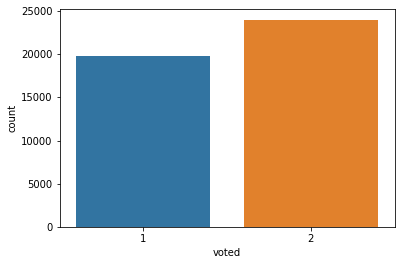

In [69]:
sns.countplot(x='voted', data=train_data[train_data['QaE'] < 2000])

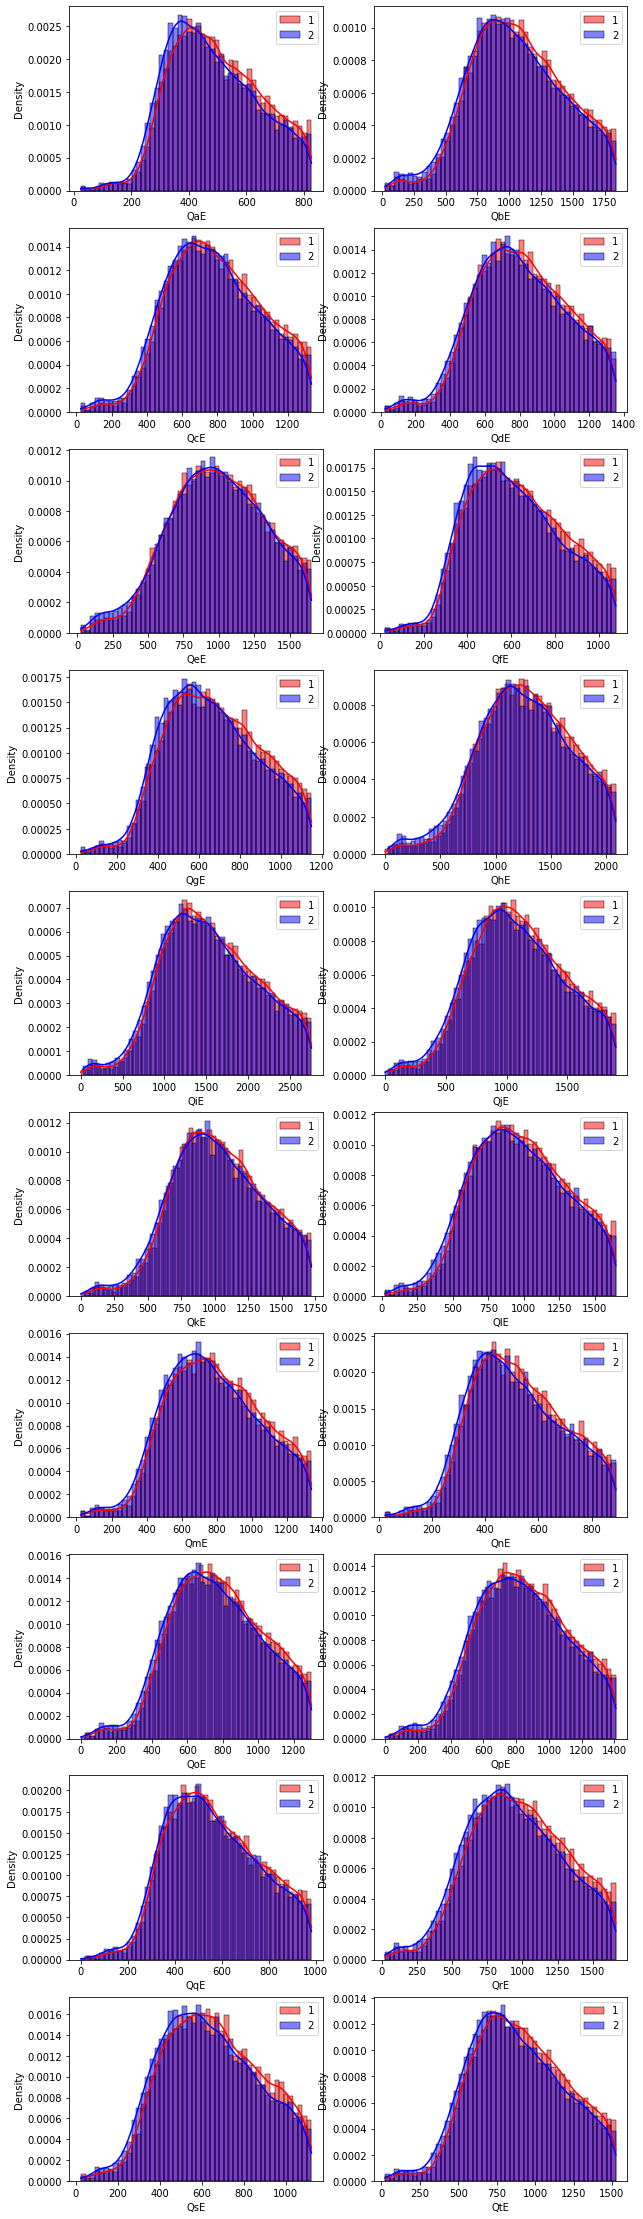

In [70]:
fig, axs = plt.subplots(figsize=(10,40), nrows=10, ncols=2, squeeze=False)
idx = 0
voted_1 = (train_data['voted'] == 1)
voted_2 = (train_data['voted'] == 2)
for row in range(0,10):
    for col in range(0,2):
        compare_data = train_data[Q_E[idx]].quantile(.75)
        sns.histplot(x=Q_E[idx], data=train_data[(voted_1) & (train_data[Q_E[idx]] < compare_data)], stat='density', kde=True, bins=50, color='red', label='1', ax=axs[row][col])
        sns.histplot(x=Q_E[idx], data=train_data[(voted_2) & (train_data[Q_E[idx]] < compare_data)], stat='density', kde=True, bins=50, color='blue', label='2', ax=axs[row][col])
        axs[row][col].legend()
        idx += 1

In [71]:
Q_E_threshold = [400, 800, 650, 700, 850, 500, 600, 1100, 1200, 800, 
                 750, 750, 750, 400, 700, 700, 450, 900, 600, 800]
# def Q_E_Categorization(x, thr):
#     if x > thr:
#         return 1
#     else:
#         return 0

# for column, thr in zip(Q_E, Q_E_threshold):
#     train_data[column+'_cat'] = train_data[column].apply(lambda x: Q_E_Categorization(x, thr))
# train_data.head()

In [72]:
# train_data = train_data.drop(Q_E, axis=1)
# train_data.head()

In [75]:
category_en_column = ['QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA',
                      'QkA','QlA','QmA','QnA','QoA','QpA','QqA','QrA','QsA','QtA',
                      'age_group', 'education', 'familysize', 'married', 'urban', 'prev_religion']

In [76]:
train_data.reset_index(drop=True, inplace=True)

In [77]:
test_data = test_data.drop(drop_columns, axis = 1)

test_data.loc[(test_data['familysize'] > 4), 'familysize'] = 5

test_data['prev_religion'] = test_data['religion'].apply(lambda x: col_religion_by_check(x))
test_data = test_data.drop('religion', axis=1)

# for column, thr in zip(Q_E, Q_E_threshold):
#     test_data[column+'_cat'] = test_data[column].apply(lambda x: Q_E_Categorization(x, thr))
# test_data = test_data.drop(Q_E, axis=1)

In [78]:
# Q_A = ['QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA',
#        'QkA','QlA','QmA','QnA','QoA','QpA','QqA','QrA','QsA','QtA']
# train_data = train_data.drop(Q_A, axis=1)
# test_data = test_data.drop(Q_A, axis=1)

In [79]:
from sklearn.preprocessing import OneHotEncoder

for column in category_en_column:
    encoder = OneHotEncoder(categories = 'auto', sparse=False)
    encoder.fit(np.array(train_data[column]).reshape(-1, 1))
    inf_dummies = encoder.transform(np.array(train_data[column]).reshape(-1, 1))
    dummies = pd.DataFrame(inf_dummies.astype(int), columns = [column + str(x) for x in encoder.categories_[0]])
    train_data = pd.concat([train_data, dummies], axis=1)

    inf_dummies = encoder.transform(np.array(test_data[column]).reshape(-1, 1))
    dummies = pd.DataFrame(inf_dummies.astype(int), columns = [column + str(x) for x in encoder.categories_[0]])
    test_data = pd.concat([test_data, dummies], axis=1)


In [80]:
train_data.shape, test_data.shape

((45532, 180), (11383, 179))

In [81]:
train_data = train_data.drop(category_en_column, axis=1)
test_data = test_data.drop(category_en_column, axis=1)
train_data.shape, test_data.shape

((45532, 154), (11383, 153))

In [82]:
train_data.head()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE,voted,wr_11,QaA1.0,QaA2.0,QaA3.0,QaA4.0,QaA5.0,QbA1.0,QbA2.0,QbA3.0,QbA4.0,QbA5.0,QcA1.0,QcA2.0,QcA3.0,QcA4.0,QcA5.0,QdA1.0,QdA2.0,QdA3.0,QdA4.0,QdA5.0,QeA1.0,QeA2.0,QeA3.0,QeA4.0,QeA5.0,QfA1.0,QfA2.0,QfA3.0,...,QqA3.0,QqA4.0,QqA5.0,QrA1.0,QrA2.0,QrA3.0,QrA4.0,QrA5.0,QsA1.0,QsA2.0,QsA3.0,QsA4.0,QsA5.0,QtA1.0,QtA2.0,QtA3.0,QtA4.0,QtA5.0,age_group+70s,age_group10s,age_group20s,age_group30s,age_group40s,age_group50s,age_group60s,education0,education1,education2,education3,education4,familysize0,familysize1,familysize2,familysize3,familysize4,familysize5,married0,married1,married2,married3,urban0,urban1,urban2,urban3,prev_religionagnostic,prev_religionatheist,prev_religionchristian_Other,prev_religionchristian_catholic,prev_religionchristian_protestant,prev_religionother
0,363,1370,997,1024,1577,539,586,1095,1142,1287,883,851,851,816,579,924,366,876,633,1115,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,647,1313,3387,2969,4320,2190,826,4082,1867,1264,2943,3927,4329,1828,1214,2414,1356,3039,4304,1346,2,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,1623,1480,1021,3374,1333,531,1167,1016,2653,1569,998,2547,918,2153,1304,1131,937,1327,1170,1409,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,504,2311,992,3245,357,1519,159,2275,2809,5614,3219,1296,9046,1216,1169,23868,581,8830,2392,1312,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,927,707,556,1062,1014,628,991,1259,1153,1388,740,1181,547,575,754,1140,323,1070,583,1889,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
train_all_data = train_data.drop('voted', axis=1)
train_target = train_data['voted']

In [85]:
X_train, X_valid, y_train, y_valid = train_test_split(train_all_data, train_target, test_size=0.3)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = X_train.values
X_train = scaler.fit_transform(X_train)
X = X_valid.values
X_valid = scaler.transform(X_valid)
X = test_data.values
test_data = scaler.transform(test_data)

In [87]:
from lightgbm import LGBMClassifier
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score

In [88]:
bayesian_params = {
    'max_depth': (6, 16), 
    'num_leaves': (24, 64), 
    'min_child_samples': (10, 200), 
    'min_child_weight':(1, 50),
    'subsample':(0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'max_bin':(10, 500),
    'reg_lambda':(0.001, 10),
    'reg_alpha': (0.01, 50) 
}

In [89]:
def lgb_roc_eval(max_depth, num_leaves, min_child_samples, min_child_weight, subsample, 
                colsample_bytree,max_bin, reg_lambda, reg_alpha):
    params = {
        "n_estimators":500, "learning_rate":0.02,
        'max_depth': int(round(max_depth)),
        'num_leaves': int(round(num_leaves)), 
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': int(round(min_child_weight)),
        'subsample': max(min(subsample, 1), 0), 
        'colsample_bytree': max(min(colsample_bytree, 1), 0),
        'max_bin':  max(int(round(max_bin)),10),
        'reg_lambda': max(reg_lambda,0),
        'reg_alpha': max(reg_alpha, 0)
    }
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric= 'auc', verbose= 100, 
                early_stopping_rounds= 300)
    valid_proba = lgb_model.predict_proba(X_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, valid_proba)
    
    return roc_auc 

In [90]:
lgbBO = BayesianOptimization(lgb_roc_eval,bayesian_params , random_state=0)
lgbBO.maximize(init_points=5, n_iter=25)

|   iter    |  target   | colsam... |  max_bin  | max_depth | min_ch... | min_ch... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.767535	training's binary_logloss: 0.572319	valid_1's auc: 0.745492	valid_1's binary_logloss: 0.580634
[200]	training's auc: 0.78325	training's binary_logloss: 0.55388	valid_1's auc: 0.747256	valid_1's binary_logloss: 0.573047
[300]	training's auc: 0.797863	training's binary_logloss: 0.542508	valid_1's auc: 0.747095	valid_1's binary_logloss: 0.572382
[400]	training's auc: 0.810626	training's binary_logloss: 0.532902	valid_1's auc: 0.746608	valid_1's binary_logloss: 0.572696
[500]	training's auc: 0.822333	training's binary_logloss: 0.523961	valid_1's auc: 0.745734	valid_1's binary_logloss: 0.573339
Did not meet early stopping. Best iteratio

[500]	training's auc: 0.79024	training's binary_logloss: 0.546096	valid_1's auc: 0.745963	valid_1's binary_logloss: 0.573174
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.79024	training's binary_logloss: 0.546096	valid_1's auc: 0.745963	valid_1's binary_logloss: 0.573174
|  8        |  0.746    |  0.7427   |  319.5    |  9.93     |  111.8    |  35.35    |  35.0     |  36.71    |  3.602    |  0.9431   |
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.761121	training's binary_logloss: 0.577235	valid_1's auc: 0.745107	valid_1's binary_logloss: 0.582902
[200]	training's auc: 0.771658	training's binary_logloss: 0.561267	valid_1's auc: 0.747184	valid_1's binary_logloss: 0.573805
[300]	training's auc: 0.781965	training's binary_logloss: 0.552906	valid_1's auc: 0.747661	valid_1's binary_logloss: 0.572376
[400]	training's auc: 0.790781	training's binary_logloss: 0.546439	valid_1's auc: 0.747122	valid_1's binary_logloss: 0.572504
[5

[300]	training's auc: 0.813729	training's binary_logloss: 0.532085	valid_1's auc: 0.747648	valid_1's binary_logloss: 0.571952
[400]	training's auc: 0.829298	training's binary_logloss: 0.519803	valid_1's auc: 0.746873	valid_1's binary_logloss: 0.572559
Early stopping, best iteration is:
[196]	training's auc: 0.794866	training's binary_logloss: 0.546632	valid_1's auc: 0.748539	valid_1's binary_logloss: 0.572156
|  16       |  0.7485   |  0.7405   |  120.1    |  12.18    |  53.76    |  42.68    |  47.66    |  10.66    |  1.986    |  0.8184   |
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.759486	training's binary_logloss: 0.579975	valid_1's auc: 0.745422	valid_1's binary_logloss: 0.584737
[200]	training's auc: 0.769666	training's binary_logloss: 0.563107	valid_1's auc: 0.747334	valid_1's binary_logloss: 0.574353
[300]	training's auc: 0.779416	training's binary_logloss: 0.55473	valid_1's auc: 0.747865	valid_1's binary_logloss: 0.572542
[400]	training

[200]	training's auc: 0.777366	training's binary_logloss: 0.55716	valid_1's auc: 0.747032	valid_1's binary_logloss: 0.573223
[300]	training's auc: 0.790691	training's binary_logloss: 0.546759	valid_1's auc: 0.747208	valid_1's binary_logloss: 0.572442
[400]	training's auc: 0.802492	training's binary_logloss: 0.538131	valid_1's auc: 0.746889	valid_1's binary_logloss: 0.572593
[500]	training's auc: 0.812211	training's binary_logloss: 0.530705	valid_1's auc: 0.745829	valid_1's binary_logloss: 0.57335
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.812211	training's binary_logloss: 0.530705	valid_1's auc: 0.745829	valid_1's binary_logloss: 0.57335
|  24       |  0.7458   |  0.8324   |  52.63    |  14.54    |  100.8    |  22.84    |  59.28    |  25.3     |  7.74     |  0.9656   |
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.760227	training's binary_logloss: 0.576711	valid_1's auc: 0.744788	valid_1's binary_logloss: 0.58205
[200

In [91]:
lgbBO.max

{'target': 0.7485963967370608,
 'params': {'colsample_bytree': 0.5288123810873695,
  'max_bin': 298.3632940551493,
  'max_depth': 14.085247061998437,
  'min_child_samples': 182.4305882973765,
  'min_child_weight': 37.647486427741015,
  'num_leaves': 54.35658240763554,
  'reg_alpha': 7.912768101857651,
  'reg_lambda': 3.0095185838236933,
  'subsample': 0.773150758899048}}

In [92]:
lgb_model = LGBMClassifier(
                nthread=4,
                n_estimators=1000,
                learning_rate=0.02,
                max_depth = 14,
                num_leaves=54,
                colsample_bytree=0.773,
                subsample=0.916,
                max_bin=298,
                reg_alpha=7.913,
                reg_lambda=3.01,
                min_child_weight=38,
                min_child_samples=182,
                silent=-1,
                verbose=-1,
                )

In [93]:
lgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)],
             eval_metric='auc', verbose=100, early_stopping_rounds=100)

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.782426	training's binary_logloss: 0.563864	valid_1's auc: 0.747504	valid_1's binary_logloss: 0.578758
[200]	training's auc: 0.806283	training's binary_logloss: 0.539407	valid_1's auc: 0.748543	valid_1's binary_logloss: 0.572048
Early stopping, best iteration is:
[170]	training's auc: 0.799193	training's binary_logloss: 0.545398	valid_1's auc: 0.748869	valid_1's binary_logloss: 0.572552


LGBMClassifier(colsample_bytree=0.773, learning_rate=0.02, max_bin=298,
               max_depth=14, min_child_samples=182, min_child_weight=38,
               n_estimators=1000, nthread=4, num_leaves=54, reg_alpha=7.913,
               reg_lambda=3.01, silent=-1, subsample=0.916, verbose=-1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

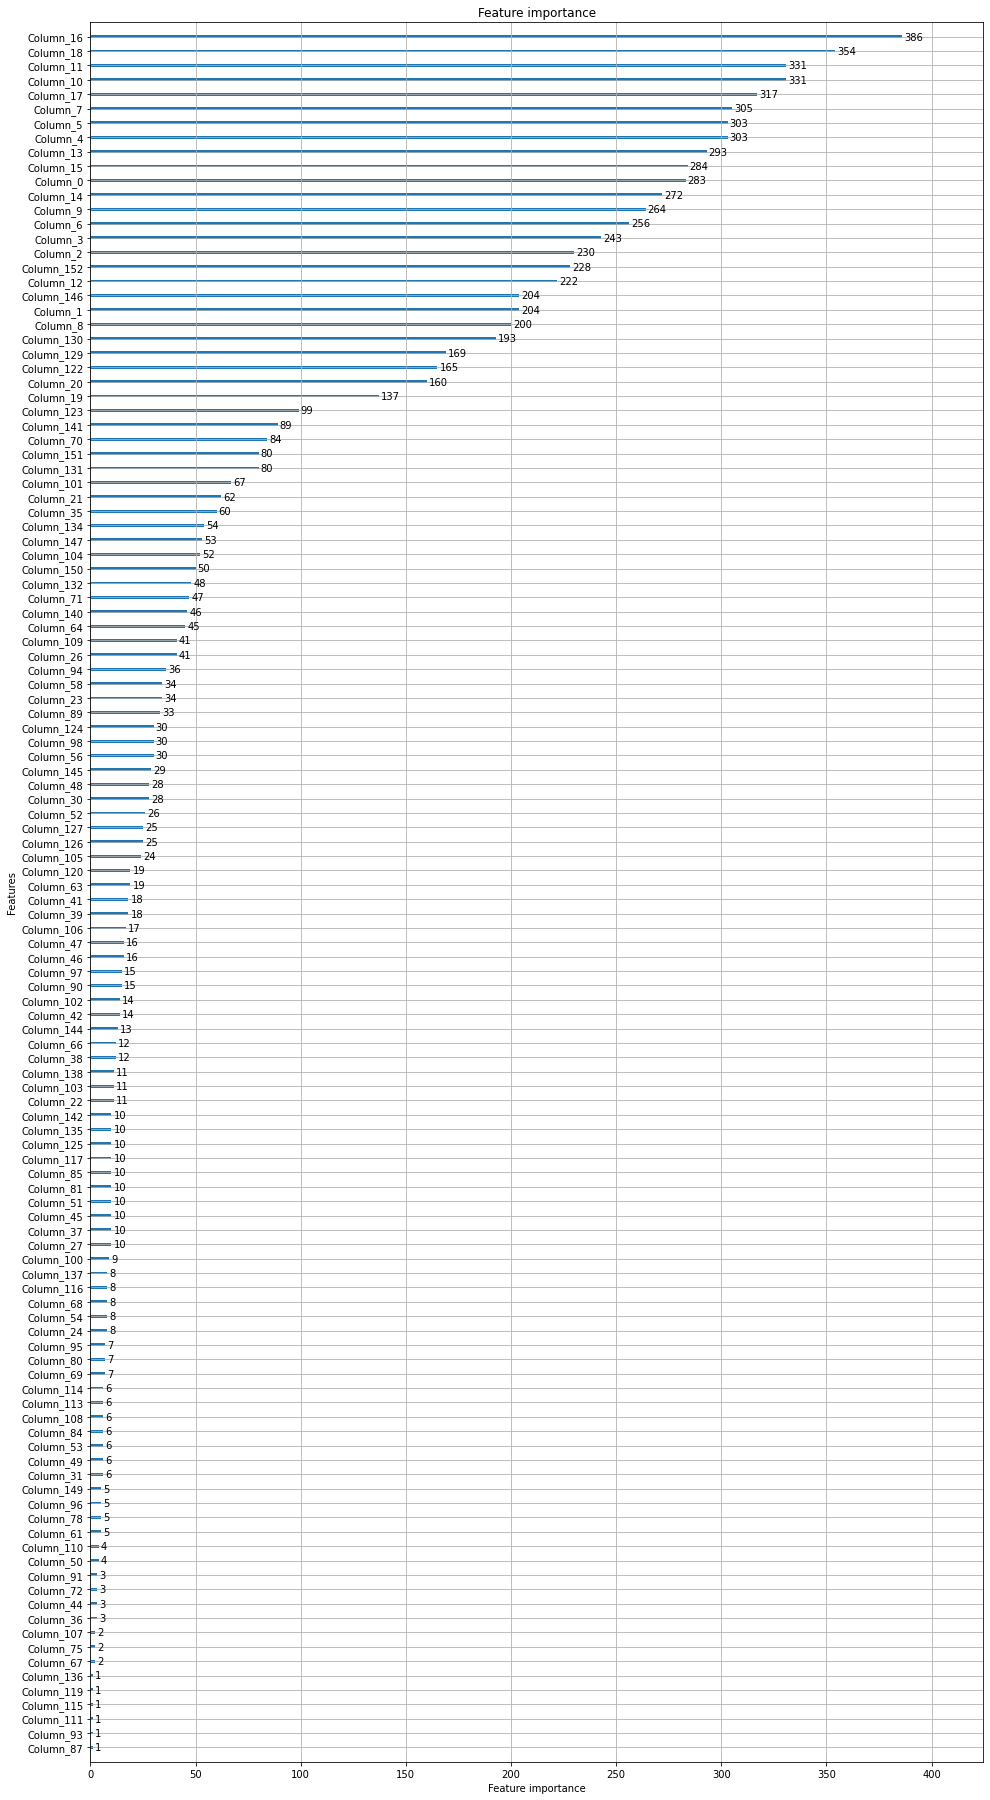

In [94]:
from lightgbm import plot_importance
plot_importance(lgb_model, figsize=(16,32))

In [95]:
preds = lgb_model.predict(test_data)

In [96]:
sub_data = pd.DataFrame()

In [98]:
test_data = pd.read_csv('./data/test_x.csv', index_col='index')

In [99]:
sub_data['index'] = test_data.index
sub_data['voted'] = preds

In [100]:
sub_data.head()

,index,voted
0,0,2
1,1,2
2,2,1
3,3,1
4,4,2


In [101]:
sub_data.to_csv('feature_engineering04.csv', index=False)